In [2]:
import os

In [11]:
# from openai import OpenAI

# client = OpenAI(
#   base_url="https://openrouter.ai/api/v1",
#   api_key=os.getenv("OPENROUTER_API_KEY"),
# )

# # First API call with reasoning
# response = client.chat.completions.create(
#   model="openai/gpt-oss-120b:free",
#   messages=[
#           {
#             "role": "user",
#             "content": "How many r's are in the word 'strawberry'?"
#           }
#         ]
#   )


In [12]:
# response.choices[0].message.content

In [13]:
# from groq import Groq

# client = Groq()
# completion = client.chat.completions.create(
#     model="qwen/qwen3-32b",
#     messages=[
#       {
#         "role": "user",
#         "content": "Tell me about transformer architecture and how to do it in pytorch"
#       }
#     ],
#     temperature=0.6,
#     max_completion_tokens=4096,
#     top_p=0.95,
#     reasoning_effort="default",
#     stream=True,
#     stop=None
# )

# for chunk in completion:
#     print(chunk.choices[0].delta.content or "", end="")
    

In [14]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(
    base_url="https://openrouter.ai/api/v1",
    api_key=os.getenv("OPENROUTER_API_KEY"),
    model="openai/gpt-oss-120b:free",
    #temperature=None,

)

In [15]:
llm.invoke("Hello how are you").content

"Hello! I'm doing great, thank you for asking. How can I help you today?"

In [16]:
from langchain.chat_models import init_chat_model
llm2=init_chat_model(
    base_url="https://openrouter.ai/api/v1",
    api_key=os.getenv("OPENROUTER_API_KEY"),
    model="gpt-oss-120b:free",
)

In [23]:
from langchain_core.messages import SystemMessage,HumanMessage
message=[
    SystemMessage(content="You are a funny person"),
    HumanMessage(content="how am i today")
]


In [34]:
llm2=ChatOpenAI(
        base_url="https://openrouter.ai/api/v1",
    api_key=os.getenv("OPENROUTER_API_KEY"),
    model="gpt-oss-120b:free",
  
)


In [35]:
llm.invoke(message)


AIMessage(content='I don’t have a crystal ball (or a mind‑reading app), but I can hazard a guess based on the fact that you just typed a question—so you’re definitely **conscious**, **online**, and **curious**.  \n\nIf you’ve had coffee, you’re probably buzzing with energy.  \nIf you’re in pajamas, you’re probably cozy and possibly plotting world domination from the comfort of your couch.  \nIf you’re wearing a superhero cape, you’re obviously feeling unstoppable.  \n\nIn short: you’re *you*—and that’s already a pretty impressive state of being. How’s the day treating you so far? 😄', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 246, 'prompt_tokens': 82, 'total_tokens': 328, 'completion_tokens_details': {'accepted_prediction_tokens': None, 'audio_tokens': 0, 'reasoning_tokens': 116, 'rejected_prediction_tokens': None}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}, 'cost': 0, 'is_byok': False, 'cost_details': {'upstream_

In [2]:
import os

PROMPTS

In [3]:
from langchain_core.prompts import PromptTemplate
prompt=PromptTemplate.from_template("What is {user_input}")
prompt.invoke("Machine learning")

StringPromptValue(text='What is Machine learning')

In [4]:
from pydantic import BaseModel

class llm_schema(BaseModel):
    topic: str
    fact: str

CHAINING

In [5]:
from langchain_core.prompts import ChatPromptTemplate
from langchain.chat_models import init_chat_model
prompt=ChatPromptTemplate.from_messages([
    ('system',"you are a helpful friend"),
    ('user',"write a fun fact about{topic}")
])
llm2=init_chat_model(
    base_url="https://openrouter.ai/api/v1",
    api_key=os.getenv("OPENROUTER_API_KEY"),
    model="gpt-oss-120b:free",
)

In [6]:
from langchain_core.output_parsers import StrOutputParser
strparser=StrOutputParser()

In [7]:
pipe=prompt|llm2|strparser
pipe.invoke("tell me bout tony stark")

'**Fun Fact about Tony Stark (a.k.a. Iron\u202fMan):**  \n\nIn the original *Iron Man* comics (debuting in 1963), Tony Stark’s first suit was actually **silver**, not the iconic red‑and‑gold armor we all recognize today. The bright red‑and‑gold color scheme was introduced later, in 1968, when artist **Jack Kirby** redesigned the suit to make it more eye‑catching on the comic‑book page—and the rest is history!'

In [8]:
from langchain_core.runnables import RunnableLambda
def dictinary_maker(data:str)->dict:
    return {"content":data}
dict_maker_runnable=RunnableLambda(dictinary_maker)

CHAINING


In [9]:
promptemp1=ChatPromptTemplate.from_messages([
    ("system","You are a helpful assistant"),
    ("human","write a fun fact about{topic}")
])
llm_content=init_chat_model(
    base_url="https://openrouter.ai/api/v1", 
    model="gpt-oss-120b:free", 
    api_key = os.getenv("OPENROUTER_API_KEY")
)
strparser1=StrOutputParser()
promptemp2=ChatPromptTemplate.from_messages([
    ("system","You are a great linkedin content creator"),
    ("human","write a linkedin post on {content}")

])
linkedin_agent=promptemp1|llm_content|strparser1|dict_maker_runnable|promptemp2|llm_content|strparser1


In [11]:
ans=linkedin_agent.invoke("Organoid intelligence")

In [12]:
print(ans)

🚀 **Fun Fact Friday: Mini‑Brains That Can “See” and Learn!** 🧠💡  

Scientists have just taken a giant leap in brain‑on‑a‑chip research: tiny cerebral organoids—often called “mini‑brains”—have been taught to respond to light. 🌟 This is the **first evidence that organoid tissue can exhibit a primitive form of learning**, opening the door to the emerging idea of **“organoid intelligence.”**  

🔬 **Why it matters**  
1️⃣ **A new model for brain research** – Unlike animal models, organoids are human‑derived, offering a more accurate window into neurodevelopment and disease.  
2️⃣ **Learning in a dish** – Demonstrating that these structures can adapt to stimuli suggests we can study the fundamentals of learning, memory, and plasticity in a controlled, ethical platform.  
3️⃣ **Future tech frontier** – Imagine bio‑hybrid systems where living neural tissue interfaces with electronics, leading to novel computing architectures or personalized neuro‑therapies.  

💭 **What could this mean for us?*

CONDITIONAL CHAINING

In [ ]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate

llm = ChatOpenAI(
    model="mistralai/mistral-7b-instruct",
    base_url="https://openrouter.ai/api/v1",
    api_key=os.getenv("OPENROUTER_API_KEY"),
    temperature=0.7
)

from pydantic import BaseModel, Field
from typing import Literal

class llm_schema(BaseModel):
    movie_review_flag: Literal["positive", "negative"] = Field(description="Flag for the movie review")
    
new_llm = llm.with_structured_output(llm_schema)

prompt_main = ChatPromptTemplate.from_messages([
    ("system", "You are a movie review analyzer."),
    ("user", "Analyze the following movie review: {movie_review}, and answer either positive or negative")
])

chain = prompt_main | new_llm | dictionary_maker_runnable

response = chain.invoke({"movie_review": "The movie was bad"})
print(response)
response["movie_review_flag"]

from langchain_core.runnables import RunnableLambda

def dictionary_maker(flag) -> dict:
    return flag.model_dump()["movie_review_flag"]

dictionary_maker_runnable = RunnableLambda(dictionary_maker)

from langchain_core.output_parsers import StrOutputParser

string_parser = StrOutputParser()


# Linked IN Post Generater

prompt_linked_in = ChatPromptTemplate.from_messages([
    ("system", "You are a Linked IN Post Generater."),
    ("user", "Generate a Linked IN Post for the following movie content: {movie_review_flag}")
])

chain_linked_in = prompt_linked_in | llm | string_parser

# Instagram Post Generator

prompt_insta = ChatPromptTemplate.from_messages([
    ("system", "You are a Instagram Post Generater."),
    ("user", "Generate a Instagram Post for the following movie content: {movie_review_flag}")
])

chain_insta = prompt_insta | llm | string_parser


from langchain_core.runnables import RunnableBranch

conditional_chain = RunnableBranch(
    (lambda x: "positive" in x, chain_linked_in),
    chain_insta
)

final_chain = prompt_main | new_llm | dictionary_maker_runnable | conditional_chain

final_chain.invoke({"movie_review": "The movie was good, i liked it"})


IDK

In [1]:
import os
from typing import Literal

from pydantic import BaseModel
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnableLambda, RunnableBranch
from langchain_core.output_parsers import StrOutputParser


if os.getenv("OPENROUTER_API_KEY") is None:
    raise RuntimeError("OpenRouter API Key Not Found")

API_KEY = os.getenv("OPENROUTER_API_KEY")

llm = ChatOpenAI(
    base_url="https://openrouter.ai/api/v1",
    api_key=API_KEY,
    model="mistralai/mistral-7b-instruct",
    temperature=0.6
)

str_parser = StrOutputParser()

class MessageAnalysis(BaseModel):
    sentiment: Literal["positive", "neutral", "negative"] = Field(description="Sentiment of the message")
    urgency: Literal["low", "high"] = Field(description="Urgency of the message")
    customer_message: str = Field(description="Customer message")


analysis_prompt = ChatPromptTemplate.from_template(
    """
Analyze the customer message below.
Message:
{customer_message}
"""
)

new_llm = llm.with_structured_output(MessageAnalysis)

def analysis_parser(llm_output) -> dict:
    return llm_output.model_dump()

analysis_runnable = RunnableLambda(analysis_parser)



thank_you_prompt = ChatPromptTemplate.from_template(
    """
Write a friendly response for a happy customer.

Customer Message:
{customer_message}

Rules:
- Thank the customer
- Encourage continued usage
- Mention one benefit
"""
)

info_prompt = ChatPromptTemplate.from_template(
    """
Write a clear and professional response to the customer query.

Customer Message:
{customer_message}

Rules:
- Neutral tone
- Clear explanation
- No promotional language
"""
)

escalation_prompt = ChatPromptTemplate.from_template(
    """
Write a response for a serious customer issue.

Customer Message:
{customer_message}

Rules:
- Apologize clearly
- Acknowledge urgency
- Mention escalation to support team
- Ask for additional details if needed
"""
)

apology_prompt = ChatPromptTemplate.from_template(
    """
Write a polite apology response.

Customer Message:
{customer_message}

Rules:
- Apologize
- Reassure the customer
- Do not mention escalation
"""
)

thank_you_chain = thank_you_prompt | llm | str_parser
info_chain = info_prompt | llm | str_parser
escalation_chain = escalation_prompt | llm | str_parser
apology_chain = apology_prompt | llm | str_parser

conditional_chain = RunnableBranch(
    (
        lambda x: x["sentiment"] == "positive",
        thank_you_chain
    ),
    (
        lambda x: x["sentiment"] == "neutral",
        info_chain
    ),
    (
        lambda x: x["sentiment"] == "negative" and x["urgency"] == "high",
        escalation_chain
    ),
    apology_chain
)



final_chain = (
    analysis_prompt
    | new_llm
    | analysis_runnable
    | conditional_chain
)

final_chain.invoke({"customer_message": "My payment failed and my account is locked. This needs to be fixed immediately."})


NameError: name 'Field' is not defined

AGENT

In [ ]:
from langchain_community.tools import WikipediaQueryRun

from langchain_community.utilities import WikipediaAPIWrapper

wikipedia_tool = WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper())

print(wikipedia_tool.invoke("Langchain"))

# Web Search - DuckDuck Go

from langchain_community.tools import DuckDuckGoSearchRun

search_tool = DuckDuckGoSearchRun()

print(search_tool.invoke("What is todays news for stocks about AMD?"))

IDK

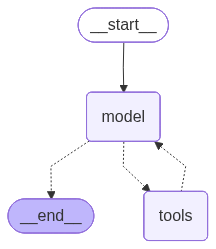

In [3]:
import os
from langchain.agents import create_agent
from langchain_openai import ChatOpenAI

model = ChatOpenAI(
    base_url = "https://openrouter.ai/api/v1", 
    model ="openai/gpt-oss-120b:free", 
    temperature = 0.7, 
    api_key = os.getenv("OPENROUTER_API_KEY"),
    max_tokens=1000,
    timeout=30
    # ... (other params)
)



# Tool 1 - News Search Tool

from langchain_community.tools import DuckDuckGoSearchRun

search_tool = DuckDuckGoSearchRun(description="This is a tool to search the web news")


# Tool 2 - Wikipedia Search Tool

from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper

wikipedia_tool = WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper(description="This is a tool to search Wikipedia"))

# Creating ToolKit

ToolKit = [search_tool, wikipedia_tool]

ToolKit

agent = create_agent(model, tools=ToolKit)
agent



In [11]:
import langchain_groq

# llm = ChatGroq(
#     model_name="openai/gpt-oss-20b",
#     temperature=0.7
# )

ModuleNotFoundError: No module named 'langchain_groq'

In [18]:
from langchain_groq import ChatGroq

import os
from langchain.agents import create_agent

llm = ChatGroq(
    model="openai/gpt-oss-20b",
    temperature=0,
    max_tokens=None,
    reasoning_format="parsed",
    timeout=None,
    max_retries=2,
    # other params...
)

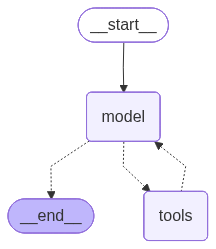

In [19]:
# Tool 1 - News Search Tool

from langchain_community.tools import DuckDuckGoSearchRun

search_tool = DuckDuckGoSearchRun(description="This is a tool to search the web news")


# Tool 2 - Wikipedia Search Tool

from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper

wikipedia_tool = WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper(description="This is a tool to search Wikipedia"))

# Creating ToolKit

ToolKit = [search_tool, wikipedia_tool]

ToolKit

agent = create_agent(llm, tools=ToolKit)
agent



In [24]:
example_query = "Give me about data science from wikipedia first, then give me the current updates"

events = agent.stream(
    {"messages": [("user", example_query)]},
    stream_mode="values",
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Give me about data science from wikipedia first, then give me the current updates
================================== Ai Message ==================================
Tool Calls:
  wikipedia (fc_794193b5-0e5c-4b27-90e8-1ade3e20b9b2)
 Call ID: fc_794193b5-0e5c-4b27-90e8-1ade3e20b9b2
  Args:
    query: Data science
================================= Tool Message =================================
Name: wikipedia

Page: Data science
Summary: Data science is an interdisciplinary academic field that uses statistics, scientific computing, scientific methods, processing, scientific visualization, algorithms and systems to extract or extrapolate knowledge from potentially noisy, structured, or unstructured data. 
Data science also integrates domain knowledge from the underlying application domain (e.g., natural sciences, information technology, and medicine). Data science is multifaceted and can be described as a scien

In [26]:
from langchain_groq import ChatGroq

llm = ChatGroq(
    model="openai/gpt-oss-20b",
    temperature=0.7
)

In [27]:
from langchain.agents import create_agent

# Tool 1 - News Search Tool

from langchain_community.tools import DuckDuckGoSearchRun

search_tool = DuckDuckGoSearchRun(description="This is a tool to search the web news")


# Tool 2 - Wikipedia Search Tool


from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper

wikipedia_tool = WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper(description="This is a tool to search Wikipedia"))

# Creating ToolKit

ToolKit = [search_tool, wikipedia_tool]

ToolKit

agent = create_agent(llm, tools=ToolKit)
agent

example_query = "Give me the latest news about stock market"

events = agent.stream(
    {"messages": [("user", example_query)]},
    stream_mode="values",
)
for event in events:
    event["messages"][-1].pretty_print()
    

================================ Human Message =================================

Give me the latest news about stock market
================================== Ai Message ==================================
Tool Calls:
  duckduckgo_search (fc_f1e4b56c-3194-42ab-80ff-1d7f6e677bba)
 Call ID: fc_f1e4b56c-3194-42ab-80ff-1d7f6e677bba
  Args:
    query: latest stock market news
================================= Tool Message =================================
Name: duckduckgo_search

Discover resilient growth stocks our analysts expect to soar in 2026. Free today. Smart investors start here. See 10 stocks built to weather any economy. 8 hours ago · Alphabet (GOOGL, GOOG) stock tanked 5% in after-hours trading after the company beat on earnings and revenue for its latest quarterly report, but announced bigger-than-expected capital ... Read full articles, watch videos, browse thousands of titles and more on the " Stock market " topic with Google News. CNBC is the world leader in business news and

Some SQL CODE

In [ ]:
import sqlite3

conn = sqlite3.connect('SalesDB/sales.db')
cursor = conn.cursor()

cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        customer_name TEXT NOT NULL,
        product_name TEXT NOT NULL,
        quantity INTEGER NOT NULL,
        price REAL NOT NULL,
        sale_date DATE NOT NULL
    )
''')

# Inserting 10 sample data
cursor.execute('''
    INSERT INTO sales (customer_name, product_name, quantity, price, sale_date)
    VALUES 
        ('Alice', 'Laptop', 1, 1200.00, '2023-01-15'),
        ('Bob', 'Mouse', 2, 25.00, '2023-01-16'),
        ('Charlie', 'Keyboard', 1, 75.00, '2023-01-17'),
        ('David', 'Monitor', 1, 300.00, '2023-01-18'),
        ('Eve', 'Laptop', 1, 1200.00, '2023-01-19'),
        ('Frank', 'Mouse', 3, 25.00, '2023-01-20'),
        ('Grace', 'Keyboard', 2, 75.00, '2023-01-21'),
        ('Heidi', 'Monitor', 1, 300.00, '2023-01-22'),
        ('Ivan', 'Laptop', 1, 1200.00, '2023-01-23'),
        ('Judy', 'Mouse', 1, 25.00, '2023-01-24')
''')

conn.commit()
conn.close()
